# FinBERT-Based News Sentiment Analysis and Technical Indicator Correlation (AAPL)

In [2]:
!pip install yfinance transformers pandas matplotlib

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from transformers import pipeline

## Load News Data

In [ ]:
news_df = pd.read_csv('AAPL_news_extended.csv')
news_df['date'] = pd.to_datetime(news_df['date'])
news_df.head()

# 2. Загрузка цен AAPL
df = yf.download("AAPL", start="2024-10-01", end="2024-10-22")
df = df[['Close']]
df.reset_index(inplace=True)  # превращаем Date в колонку 'Date'
df.rename(columns={'Date': 'date'}, inplace=True)

,date,headline
0,2024-10-01,Apple beats Q3 expectations amid strong iPhone...
1,2024-10-02,Apple faces antitrust scrutiny from the EU
2,2024-10-03,New iPad Pro expected to be delayed until Q1 2025
3,2024-10-04,Apple stock climbs after bullish analyst upgrade
4,2024-10-05,Foxconn reports decline in Apple device shipments


## Run FinBERT Sentiment Analysis

In [ ]:
model_name = 'ProsusAI/finbert'
sentiment_pipeline = pipeline('sentiment-analysis', model=model_name, tokenizer=model_name)
news_df['sentiment_result'] = news_df['headline'].apply(lambda x: sentiment_pipeline(x)[0])
news_df['sentiment'] = news_df['sentiment_result'].apply(lambda x: x['label'])
news_df['score'] = news_df['sentiment_result'].apply(lambda x: x['score'])
news_df.drop('sentiment_result', axis=1, inplace=True)
news_df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


,date,headline,sentiment,score
0,2024-10-01,Apple beats Q3 expectations amid strong iPhone...,positive,0.943701
1,2024-10-02,Apple faces antitrust scrutiny from the EU,negative,0.886086
2,2024-10-03,New iPad Pro expected to be delayed until Q1 2025,neutral,0.506329
3,2024-10-04,Apple stock climbs after bullish analyst upgrade,positive,0.589304
4,2024-10-05,Foxconn reports decline in Apple device shipments,negative,0.968591
5,2024-10-06,Apple expands chip production partnership with...,positive,0.882877
6,2024-10-07,Weak demand for MacBooks weighs on Apple shares,negative,0.964709
7,2024-10-08,Apple announces new AI-powered features for iOS,neutral,0.574099
8,2024-10-09,Wall Street optimistic ahead of Apple’s Octobe...,negative,0.395484
9,2024-10-10,"Apple reveals faster M3 chips, improved Mac pe...",positive,0.948552


## Download AAPL Price Data and Calculate RSI

In [ ]:
df = yf.download('AAPL', start='2024-09-25', end='2024-11-01')
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))
df = df[['Close', 'RSI']]
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,RSI
Ticker,AAPL,
Date,,
2024-09-25,225.577057,NaN
2024-09-26,226.723038,NaN
2024-09-27,226.992081,NaN
2024-09-30,232.183838,NaN
2024-10-01,225.417648,NaN


## Calculate MACD Indicator

In [ ]:
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df.tail()

Price,Close,RSI,MACD,Signal
Ticker,AAPL,,,
Date,,,,
2024-10-25,230.599426,66.385766,1.548249,1.506735
2024-10-28,232.582443,63.837551,1.574208,1.520230
2024-10-29,232.851501,58.579190,1.598069,1.535798
2024-10-30,229.294006,51.952878,1.314764,1.491591
2024-10-31,225.118683,47.251992,0.744744,1.342221


## Merge Sentiment with Price and Indicators

In [ ]:
print("Колонки df:", df.columns.tolist())
print("Колонки news_df:", news_df.columns.tolist())

Колонки df: ['Close', 'RSI', 'MACD', 'Signal']
Колонки news_df: ['date', 'headline']


In [ ]:
# Шаг 1: Загрузка данных о ценах акций AAPL
df = yf.download("AAPL", start="2024-10-01", end="2024-10-22")

# Шаг 2: Сброс индекса и переименование столбца 'Date' в 'date'
df.reset_index(inplace=True)
df.rename(columns={'Date': 'date'}, inplace=True)

# Шаг 3: Преобразование столбца 'date' в формат datetime
df['date'] = pd.to_datetime(df['date'])



# # Правильно расплющим вложенные имена колонок
# df.columns = [col if isinstance(col, str) else col[0] for col in df.columns]

# Проверим — должно быть: ['index', 'date', 'Close', 'RSI', 'MACD', 'Signal']
print(df.columns)

[*********************100%***********************]  1 of 1 completed

MultiIndex([(  'date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [ ]:
# Убедимся, что дата — это datetime
df['date'] = pd.to_datetime(df['date'])
news_df['date'] = pd.to_datetime(news_df['date'])

# Объединяем
merged_df = pd.merge(df, news_df, how='left', on='date')
merged_df.set_index('date', inplace=True)

merged_df.head()

MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

## Visualize Price with News Sentiment

KeyError: 'sentiment'

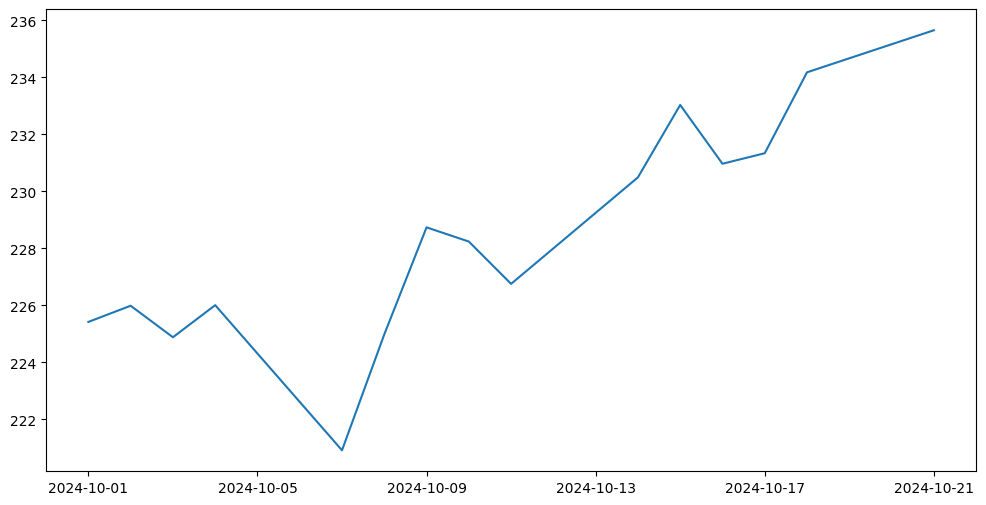

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['Close_AAPL'], label='AAPL Close Price')
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'gray'}
for idx, row in merged_df.iterrows():
    if pd.notna(row['headline']):
        plt.scatter(idx, row['Close_AAPL'], color=colors.get(row['sentiment'], 'blue'), s=100)
plt.title('AAPL Price with News Sentiment Events')
plt.legend()
plt.grid(True)
plt.show()

## Encode Sentiment and Correlate

In [1]:
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
merged_df['sentiment_score'] = merged_df['sentiment'].map(sentiment_mapping)
merged_df[['Close', 'RSI', 'MACD', 'sentiment_score']].dropna().corr()

NameError: name 'merged_df' is not defined

## Visualize RSI with Sentiment

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(merged_df['RSI'], label='RSI', color='blue')
plt.scatter(merged_df.index, merged_df['RSI'],
            c=merged_df['sentiment_score'], cmap='coolwarm', s=100, label='Sentiment')
plt.axhline(70, color='red', linestyle='--', linewidth=1)
plt.axhline(30, color='green', linestyle='--', linewidth=1)
plt.title('RSI with News Sentiment Coloring')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Шаг 1: Загрузка данных о ценах акций AAPL
df = yf.download("AAPL", start="2024-10-01", end="2024-10-22")

# Шаг 2: Сброс индекса и переименование столбца 'Date' в 'date'
df.reset_index(inplace=True)
df.rename(columns={'Date': 'date'}, inplace=True)

# Шаг 3: Преобразование столбца 'date' в формат datetime
df['date'] = pd.to_datetime(df['date'])

# Шаг 4: Загрузка и подготовка новостных данных
news_df = pd.read_csv('AAPL_news_extended.csv')
news_df['date'] = pd.to_datetime(news_df['date'])

# Шаг 5: Объединение данных по дате
merged_df = pd.merge(df, news_df, how='left', on='date')
merged_df.set_index('date', inplace=True)

# Шаг 6: Визуализация
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'gray'}

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Close'], label='AAPL Close Price')

for idx, row in merged_df.iterrows():
    if pd.notna(row.get('headline')):
        plt.scatter(idx, row['Close'], color=colors.get(row.get('sentiment'), 'blue'), s=100)

plt.title('AAPL Price with News Sentiment Events')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


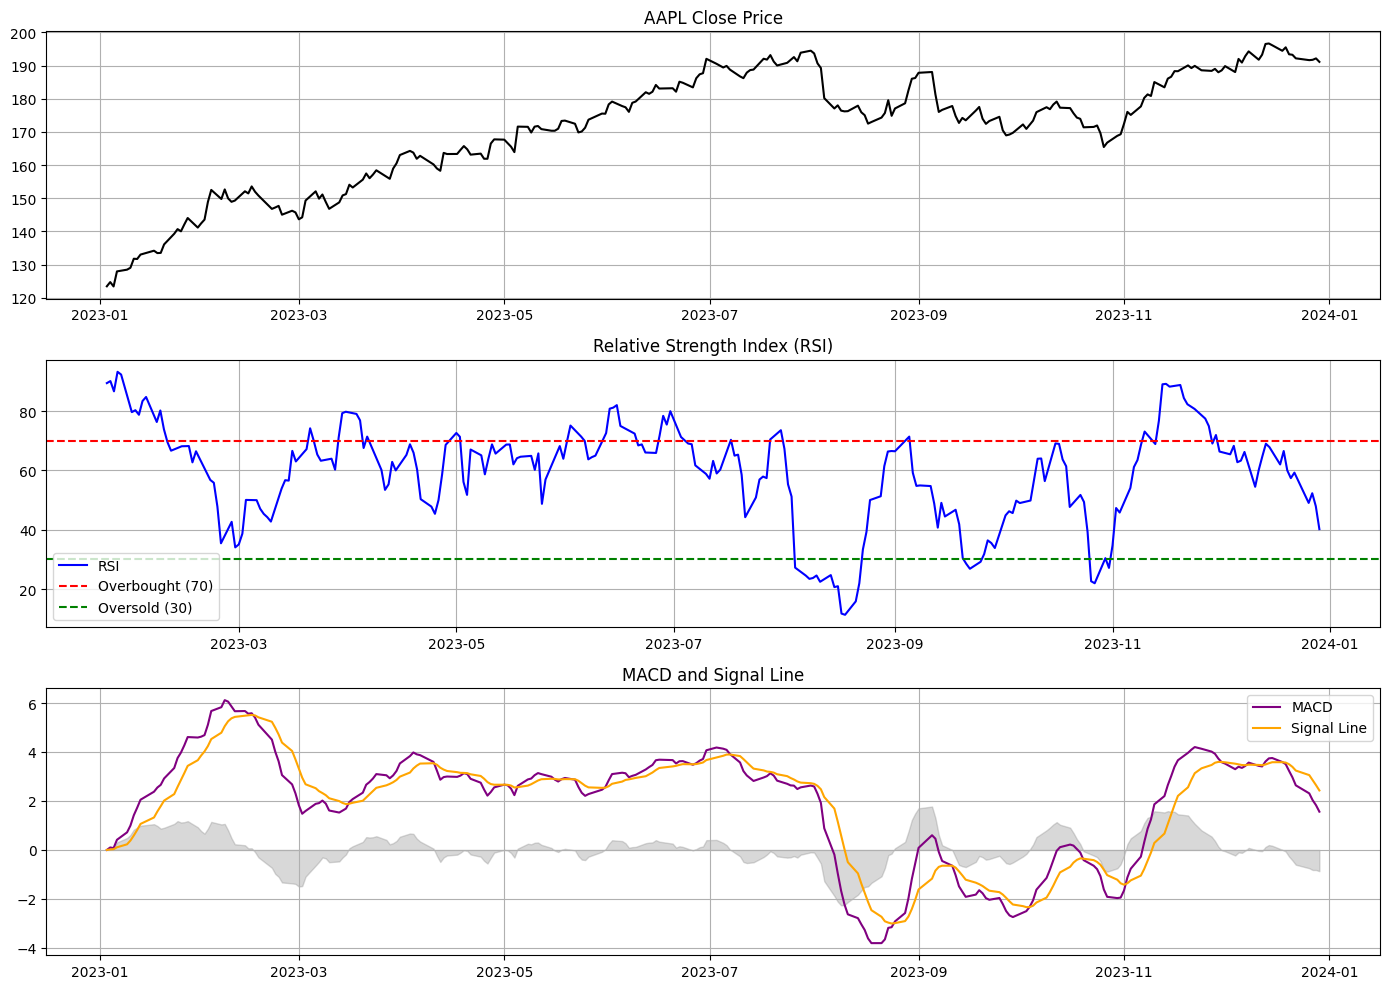

In [3]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'
df = yf.download(ticker, start=start_date, end=end_date)

# Расчет RSI
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Расчет MACD
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Построение графиков
plt.figure(figsize=(14, 10))

# Цена
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='black')
plt.title('AAPL Close Price')
plt.grid(True)

# RSI
plt.subplot(3, 1, 2)
plt.plot(df.index, df['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.grid(True)
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(df.index, df['MACD'], label='MACD', color='purple')
plt.plot(df.index, df['Signal'], label='Signal Line', color='orange')
plt.fill_between(df.index, df['MACD'] - df['Signal'], color='grey', alpha=0.3)
plt.title('MACD and Signal Line')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()